In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [204]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()

In [205]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [206]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [207]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [208]:
df=pd.DataFrame(data.data, columns=data.feature_names)

In [209]:
df['price']=data.target

In [210]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [211]:
df.shape

(20640, 9)

In [212]:
df=df.sample(frac=0.20, random_state=1)
# taking 20 % of the dta for our case so that we can visualize the tree

In [213]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36,3.550
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78,0.707
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42,2.294
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28,1.125
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13,2.254
...,...,...,...,...,...,...,...,...,...
2319,2.3173,25.0,4.915289,1.115702,1482.0,3.061983,36.82,-119.70,0.682
5341,2.1875,49.0,4.571429,1.000000,14.0,2.000000,34.04,-118.44,2.250
16888,5.0480,26.0,5.000000,1.000000,11.0,3.666667,37.60,-122.37,3.500
6823,4.8750,42.0,5.347985,1.058608,829.0,3.036630,34.09,-118.10,2.273


In [214]:
df.shape

(4128, 9)

In [215]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [216]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
...,...,...,...,...,...,...,...,...
2319,2.3173,25.0,4.915289,1.115702,1482.0,3.061983,36.82,-119.70
5341,2.1875,49.0,4.571429,1.000000,14.0,2.000000,34.04,-118.44
16888,5.0480,26.0,5.000000,1.000000,11.0,3.666667,37.60,-122.37
6823,4.8750,42.0,5.347985,1.058608,829.0,3.036630,34.09,-118.10


In [217]:
y

4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
         ...  
2319     0.682
5341     2.250
16888    3.500
6823     2.273
11878    1.417
Name: price, Length: 4128, dtype: float64

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1)

In [219]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='squared_error')
#criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”

In [220]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [221]:
y_pred=model.predict(X_test)

In [222]:
y_pred

array([2.098  , 1.138  , 2.027  , 0.71   , 1.25   , 0.517  , 2.028  ,
       2.318  , 3.065  , 1.804  , 2.494  , 0.742  , 2.235  , 4.29   ,
       2.557  , 4.5    , 2.165  , 1.598  , 1.265  , 1.406  , 1.27   ,
       1.25   , 1.979  , 0.997  , 1.367  , 1.961  , 0.478  , 2.552  ,
       1.7    , 5.00001, 2.108  , 1.625  , 1.891  , 2.4    , 1.125  ,
       1.391  , 0.689  , 0.868  , 1.186  , 2.099  , 2.854  , 2.256  ,
       2.938  , 2.736  , 2.173  , 0.75   , 1.639  , 1.438  , 4.139  ,
       2.308  , 1.382  , 1.414  , 2.728  , 3.325  , 1.876  , 2.563  ,
       1.425  , 1.117  , 1.656  , 1.75   , 1.25   , 0.469  , 0.905  ,
       2.083  , 0.906  , 5.00001, 1.133  , 2.06   , 2.866  , 1.876  ,
       0.806  , 1.564  , 2.218  , 0.602  , 1.118  , 1.461  , 0.929  ,
       1.732  , 3.     , 3.235  , 2.333  , 1.491  , 3.9    , 2.129  ,
       1.976  , 1.78   , 2.287  , 3.558  , 1.61   , 1.766  , 0.75   ,
       1.338  , 0.467  , 1.024  , 2.008  , 3.087  , 2.099  , 1.5    ,
       1.994  , 1.59

In [223]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5570311015441323


In [224]:
# hyperameter tuning: 
parameter={'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter': ['best', 'random'],
        'max_depth': [1,2,3,4,5,6],
        'max_features': ['sqrt', 'log2', 'auto']
}

In [225]:
regressor=DecisionTreeRegressor()

In [226]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(regressor, param_grid=parameter, cv=3,scoring='neg_mean_squared_error' )

In [227]:
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [228]:
model.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [231]:
final_model=DecisionTreeRegressor(criterion='poisson',max_depth= 5,max_features='log2',splitter= 'best')

In [232]:
final_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features='log2')

In [233]:
y_pred=final_model.predict(X_test)

In [234]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5603804507742947


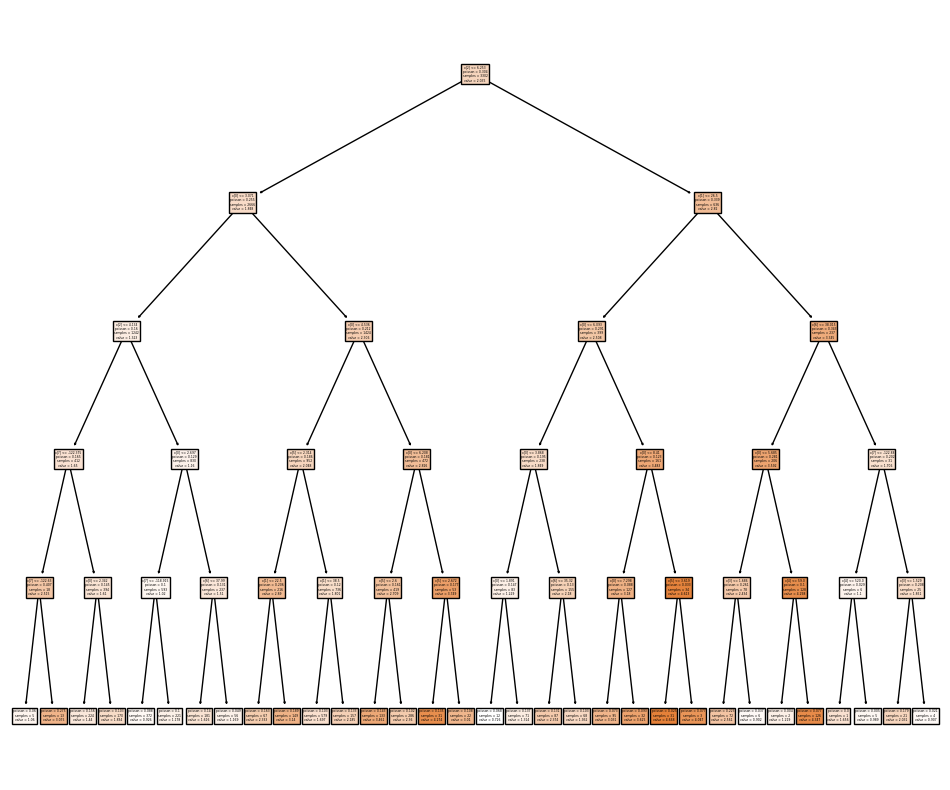

In [235]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(final_model, filled=True)

plt.show()